In [26]:
import numpy as np
import pandas as pd
health_df = pd.read_csv('NHIS_OPEN_GJ_2011.CSV', header=0,
                        encoding='cp949')
health_df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  \
0  2011   762544     2            1    47        145          40    66    1.2   
1  2011    56745     2            1    26        145          45    68    0.9   
2  2011   171067     2            1    26        145          45    65    1.0   
3  2011   196496     2            1    27        145          45    68    0.9   
4  2011   812525     2            1    46        150          35    56    0.7   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.2  ...     13   1.0   1.0          1      NaN    0.0      0.0   
1    1.0  ...     12   1.0   0.0          0      NaN    NaN      NaN   
2    1.5  ...     16   1.0   0.0          0      NaN    NaN      NaN   
3    0.9  ...     23   1.0   0.0          1      NaN    0.0      0.0   
4    0.9  ...      8   1.0   0.0          0      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           0.0  0.0  20151220  
1           NaN  NaN  20151220  
2           NaN  NaN  20151220  
3           0.0  0.0  20151220  
4           NaN  NaN  20151220  

[5 rows x 34 columns]

In [27]:
# 필요 없는 데이터 제거
health_df = health_df.iloc[:,2:]

health_df.head()

성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  시력(우)  청력(좌)  \
0     2            1    47        145          40    66    1.2    1.2    1.0   
1     2            1    26        145          45    68    0.9    1.0    1.0   
2     2            1    26        145          45    65    1.0    1.5    1.0   
3     2            1    27        145          45    68    0.9    0.9    1.0   
4     2            1    46        150          35    56    0.7    0.9    1.0   

   청력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...     13   1.0   1.0          1      NaN    0.0      0.0   
1    1.0  ...     12   1.0   0.0          0      NaN    NaN      NaN   
2    1.0  ...     16   1.0   0.0          0      NaN    NaN      NaN   
3    1.0  ...     23   1.0   0.0          1      NaN    0.0      0.0   
4    1.0  ...      8   1.0   0.0          0      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           0.0  0.0  20151220  
1           NaN  NaN  20151220  
2           NaN  NaN  20151220  
3           0.0  0.0  20151220  
4           NaN  NaN  20151220  

[5 rows x 32 columns]

In [28]:
#데이터 분석부터 하기
#성별 코드랑 시도 코드, 연령대 코드 제외하기
filter_health_df = health_df.iloc[:,3:]
#데이터 공개 일자 지우기
filter_health_df = filter_health_df.iloc[:,:-7]
filter_health_df.head()

신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  시력(우)  청력(좌)  청력(우)  수축기혈압  이완기혈압  \
0        145          40    66    1.2    1.2    1.0    1.0    110     75   
1        145          45    68    0.9    1.0    1.0    1.0    110     70   
2        145          45    65    1.0    1.5    1.0    1.0    110     70   
3        145          45    68    0.9    0.9    1.0    1.0    100     70   
4        150          35    56    0.7    0.9    1.0    1.0     98     64   

   식전혈당(공복혈당)  ...  HDL콜레스테롤  LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  \
0          93  ...      56.0     135.0  12.4  1.0      0.7          13   
1          94  ...      57.0      81.0  13.6  1.0      0.8          17   
2          78  ...      39.0      74.0  14.3  1.0      0.9          35   
3          61  ...      61.0     117.0  13.4  1.0      0.7          16   
4          85  ...      43.0      78.0  13.1  1.0      0.5          23   

   (혈청지오티)ALT  감마지티피  흡연상태  음주여부  
0          11     13   1.0   1.0  
1          14     12   1.0   0.0  
2          26     16   1.0   0.0  
3          12     23   1.0   0.0  
4          16      8   1.0   0.0  

[5 rows x 22 columns]

In [29]:
#데이터 갑이 많아서 8개씩 잘라서 보기
filter_health_df_1 = filter_health_df.iloc[:,0:4]
filter_health_df_2 = filter_health_df.iloc[:,5:10]
filter_health_df_3 = filter_health_df.iloc[:,11:16]
filter_health_df_4 = filter_health_df.iloc[:,17:22]

filter_health_df_4.head()

(혈청지오티)AST  (혈청지오티)ALT  감마지티피  흡연상태  음주여부
0          13          11     13   1.0   1.0
1          17          14     12   1.0   0.0
2          35          26     16   1.0   0.0
3          16          12     23   1.0   0.0
4          23          16      8   1.0   0.0

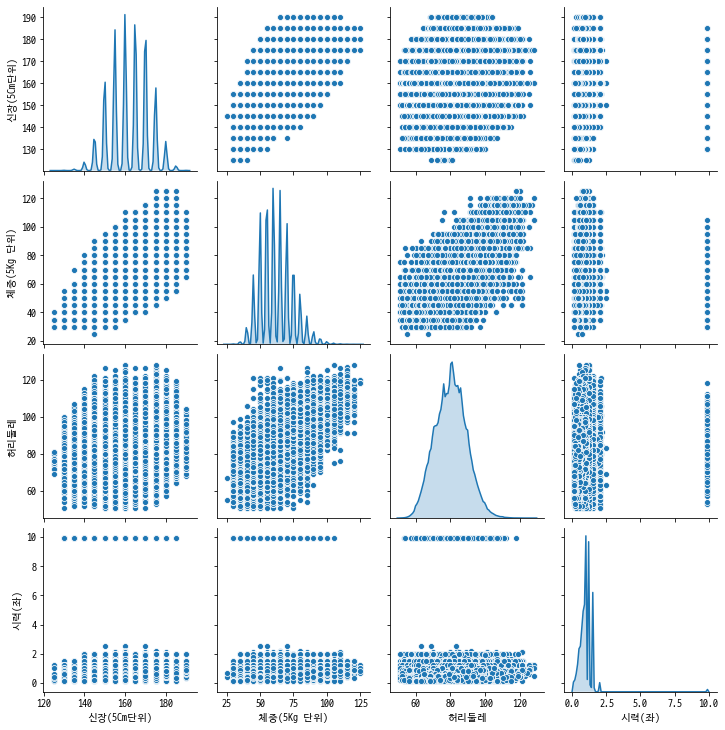

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = "D2Coding"

sns.pairplot(filter_health_df_1, diag_kind='kde', palette='bright')

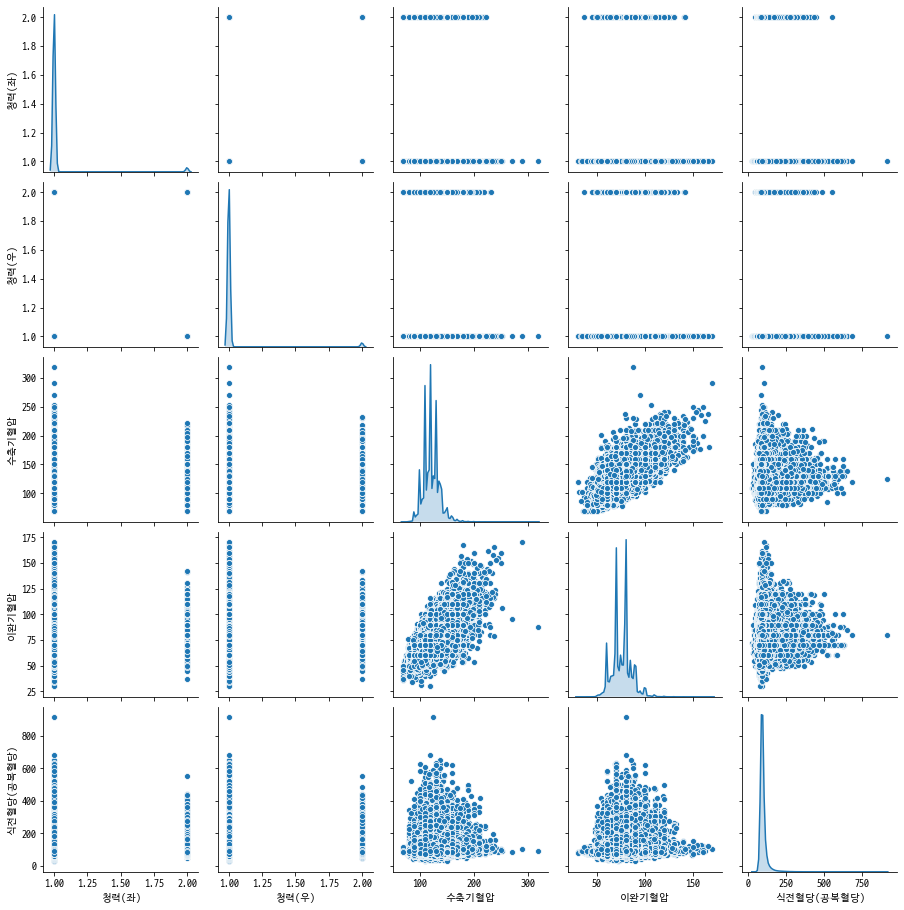

In [31]:
sns.pairplot(filter_health_df_2, diag_kind='kde', palette='bright')

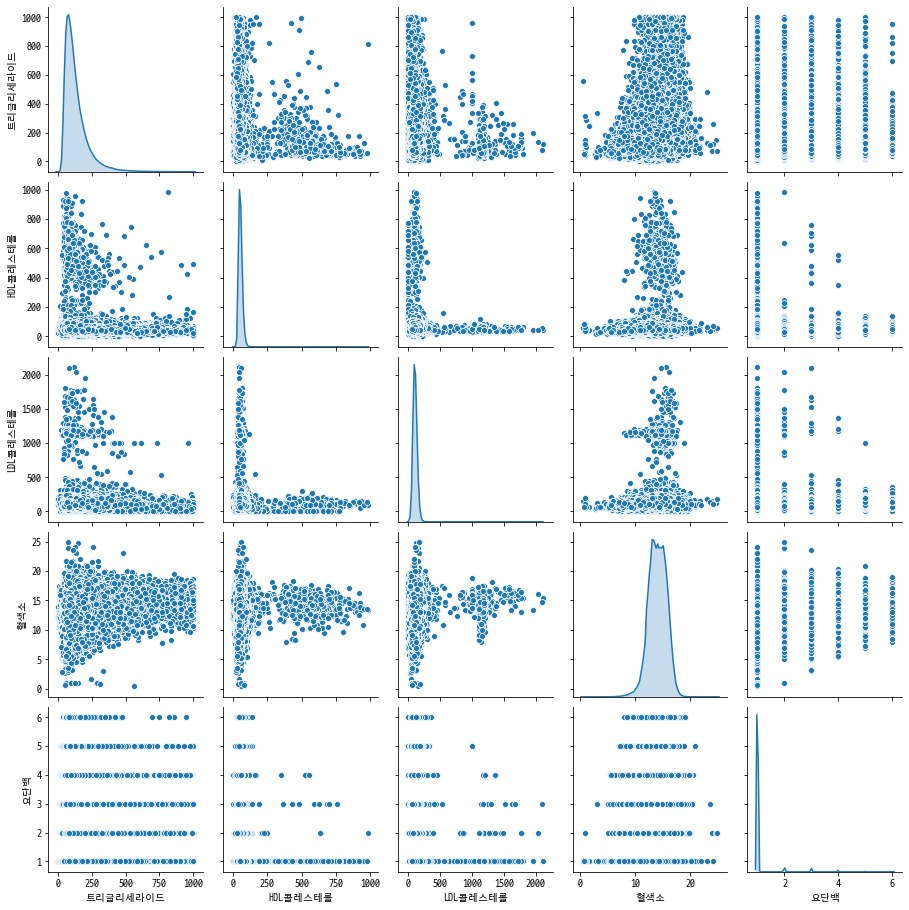

In [32]:
sns.pairplot(filter_health_df_3, diag_kind='kde', palette='bright')

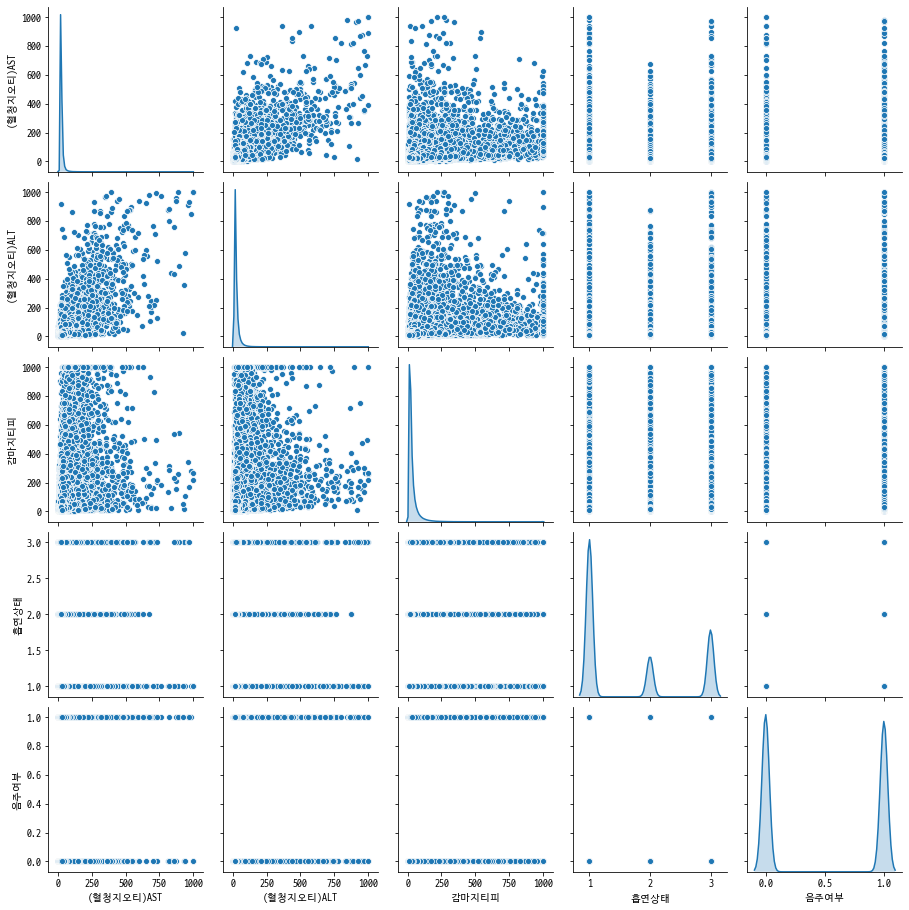

In [33]:
sns.pairplot(filter_health_df_4, diag_kind='kde', palette='bright')
